In [1]:
from decouple import config 
import jwt
import time
import requests
import nbformat

In [2]:
payload = {
    'iat': int(time.time()),
    'exp': int(time.time()) + 60,
    'iss': '398519'
}


In [3]:
# Your GitHub App settings
APP_ID = '398519'
INSTALLATION_ID = '43170684'
REPO_OWNER = 'amfor'
REPO_NAME = 'nbdiff'
FILE_PATH = 'src/mynotebook.ipynb'

# Create a JSON Web Token (JWT)
payload = {
    'iat': int(time.time()),
    'exp': int(time.time()) + 60,
    'iss': APP_ID
}
jwt_token = jwt.encode(payload, config("GITHUB_PRIVATE_KEY"), algorithm='RS256')

# Use the JWT to get an access token
headers = {
    'Authorization': f'Bearer {jwt_token}',
    'Accept': 'application/vnd.github.machine-man-preview+json'
}
access_token_response = requests.post(f'https://api.github.com/app/installations/{INSTALLATION_ID}/access_tokens', headers=headers)

access_token = access_token_response.json().get('token')

# Use the access token to access the file content
file_content_response = requests.get(f'https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/contents/{FILE_PATH}', headers={'Authorization': f'Bearer {access_token}'})
file_content = file_content_response.json().get('content')

# Use the access token to access the file content
if file_content_response.status_code == 200:
    file_content = file_content_response.json().get('content')
    
    if file_content:
        # Decode the base64-encoded content
        import base64
        decoded_content = base64.b64decode(file_content).decode('utf-8')


In [4]:
notebook['cells'][0]['metadata']

In [18]:
import nbformat
from bookship.nbformatting.review_exporter import MyExporter

# You can now use the 'decoded_content' in your Django app
html_exporter = MyExporter()
notebook = nbformat.reads(decoded_content, as_version=4)
(body, resources) = html_exporter.from_notebook_node(notebook)

In [6]:
with open('./test.html', 'w') as f:
    f.write(body)

In [7]:
from nbconvert.filters.highlight import Highlight2HTML
from nbconvert.filters.markdown_mistune import IPythonRenderer, MarkdownWithMath
from nbconvert.filters.widgetsdatatypefilter import WidgetsDataTypeFilter
from nbconvert.utils.iso639_1 import iso639_1

self=html_exporter
nb=notebook
langinfo = nb.metadata.get("language_info", {})
lexer = langinfo.get("pygments_lexer", langinfo.get("name", None))
highlight_code = self.filters.get(
    "highlight_code", Highlight2HTML(pygments_lexer=lexer, parent=self)
)

filter_data_type = WidgetsDataTypeFilter(
    notebook_metadata=self._nb_metadata, parent=self, resources=resources
)

html, resources = html_exporter.from_notebook_node(nb, resources)


from bs4 import BeautifulSoup

"""Convert from notebook node."""
langinfo = nb.metadata.get("language_info", {})
lexer = langinfo.get("pygments_lexer", langinfo.get("name", None))
highlight_code = html_exporter.filters.get(
    "highlight_code", Highlight2HTML(pygments_lexer=lexer, parent=html_exporter)
)

filter_data_type = WidgetsDataTypeFilter(
    notebook_metadata=html_exporter._nb_metadata, parent=html_exporter, resources=resources
)

html_exporter.register_filter("highlight_code", highlight_code)
html_exporter.register_filter("filter_data_type", filter_data_type)
html, resources = html_exporter.from_notebook_node(nb, resources)
soup = BeautifulSoup(html, features="html.parser")
# Add image's alternative text
missing_alt = 0
for elem in soup.select("img:not([alt])"):
    elem.attrs["alt"] = "No description has been provided for this image"
    missing_alt += 1
if missing_alt:
    html_exporter.log.warning(f"Alternative text is missing on {missing_alt} image(s).")
# Set input and output focusable
for elem in soup.select(".jp-Notebook div.jp-Cell-inputWrapper"):
    elem.attrs["tabindex"] = "0"
for elem in soup.select(".jp-Notebook div.jp-OutputArea-output"):
    elem.attrs["tabindex"] = "0"


In [20]:
classname = "highlight hl-ipython3"
div_elements = soup.find_all("div", class_=classname)
for div_element in div_elements:
    pre_element = div_element.find('pre')
    startlen, endlen = len('<pre><span></span>'), -len('</pre>')
    buttonstr = '<button class="add-line-comment">+</button>'
    lines = str(pre_element)[startlen:endlen-2].split('\n')
    commentable_cell_contents = '<pre><span></span>'  + "\n".join([buttonstr + _ if len(_) > 1 else _ for _ in lines]) + '</pre>'    
    pre_element.replace_with(BeautifulSoup(commentable_cell_contents, 'html.parser').pre)
        


In [19]:
with open('./test.html', 'w') as f:
    f.write(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Notebook
  </title>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js">
  </script>
  <style type="text/css">
   pre { line-height: 125%; }
td.linenos .normal { color: inherit; background-color: transparent; padding-left: 5px; padding-right: 5px; }
span.linenos { color: inherit; background-color: transparent; padding-left: 5px; padding-right: 5px; }
td.linenos .special { color: #000000; background-color: #ffffc0; padding-left: 5px; padding-right: 5px; }
span.linenos.special { color: #000000; background-color: #ffffc0; padding-left: 5px; padding-right: 5px; }
.highlight .hll { background-color: var(--jp-cell-editor-active-background) }
.highlight { background: var(--jp-cell-editor-background); color: var(--jp-mirror-editor-variable-color) }
.highlight .c { color: var(--jp-mirror-editor-comment-color
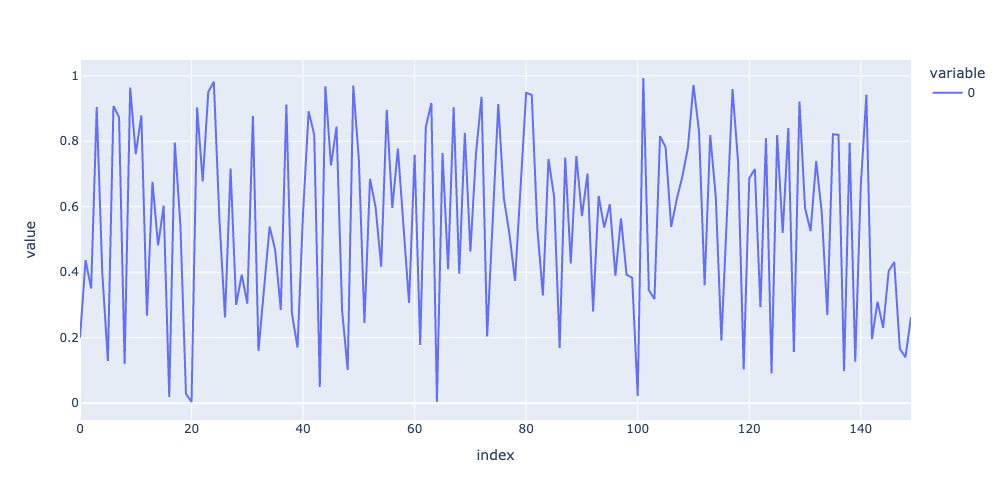

In [10]:
classname = "highlight hl-ipython3"
div_elements = soup.find_all("div", class_=classname)
button = soup.new_tag("button")
button["class"] = "add-line-comment"
button.string = "+"
# Loop through each div element
for div_element in div_elements:
    # Find the <pre> element within the div
    pre_element = div_element.find("pre")

    # Find the <span> elements within the <pre> element
    span_elements = pre_element.find_all("span")

    # Initialize a variable to keep track of the index
    index = 0

    # Loop through the <span> elements
    while index < len(span_elements):
        span = span_elements[index]

        # Check if the next two characters match "\n"
        if span.next_sibling and span.next_sibling.string == '\n':

            # Insert the button immediately after the <span>
            span.insert_after(button)
            # Move the index two positions ahead to skip "\n"
            index += 2
        else:
            # Move to the next <span> element
            index += 1
    break

# Get the modified HTML content
modified_html_content = soup.prettify()

# Print or use modified_html_content as needed
print(modified_html_content)



In [11]:
'\n' in str(div_element)

True

In [12]:
div_element.find_all('span')[0]

<span></span>

In [13]:
div_element.getText()

'+import plotly.express as px\n+import numpy as np+\n+from plotly.offline import init_notebook_mode\n \n+init_notebook_mode(connected=True)'